# Chapter 2: End to End applicaiton 
#### California housing price modelling 
#### book github repo: https://github.com/ageron/handson-ml


#### dataset sources 
- UC Irving ML repo: https://archive.ics.uci.edu/ml/datasets.php
- Kaggle datasets: https://www.kaggle.com/datasets?fileType=csv
- AWS datasets: https://registry.opendata.aws/

- Meta portals: https://dataportals.org/
- Open data monitor:  https://opendatamonitor.eu
- Nasdaq: https://data.nasdaq.com/search
- Wikipedia list of Machine learning datasets: https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research
- Datasets subreddit: https://www.reddit.com/r/datasets/


# Objective: Prediction of the median house prices in an area. 

#### problems is a regression problem: output is a predicted value. 
    - multivariate regression problem: many features to predict the house price. 
    - patch learning could do just fine, as there is no stream of data continuously adjusting the result. 


### performance measure (loss function): 
### RMSE : Root mean square error: 
$ RMSE(X,h) = \sqrt{\frac{1}{m}\sum_{i=1}^{m}(h x_i-y_i)^2}$
##### It basically measures the distance between two vectors : 
- vector of prediction (X*h)
- vector of labels (y)
it acts as a ruler. vector norm. There are different types of norms: 
1- RMSE, aka Eucleadean norm. most common one, called L2. 
2- sum of absolutes, MAE (mean absolute error), L1 norm. 
3- Ln norm is the kth root of the sum of vector elements, each raised to the power k. 

The more the norm index, the more it magnifies the effect of large values. That is why RMSE is more sensitive to outliers. 


In [27]:
# Fetching the data function 
#downloaded the datasets from the book github repo (check first cell). 
import matplotlib.pyplot as plt
import pandas as pd 
def load_housing_data(path):
    return pd.read_csv(path)


housing = load_housing_data("./housing.csv")
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [21]:
housing.info()
#There are 20640 rows in the table, (20k) is very small by ML standards. 
#total bedrooms is missing 7 values (20433) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [29]:
housing.describe()
#Describe option shows statistics about different columns 
#Percentiles show how much of the values are below certain value. 
#e.g. 25% of the values < 18 for age, half of the values <29 , 75% < 37 


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


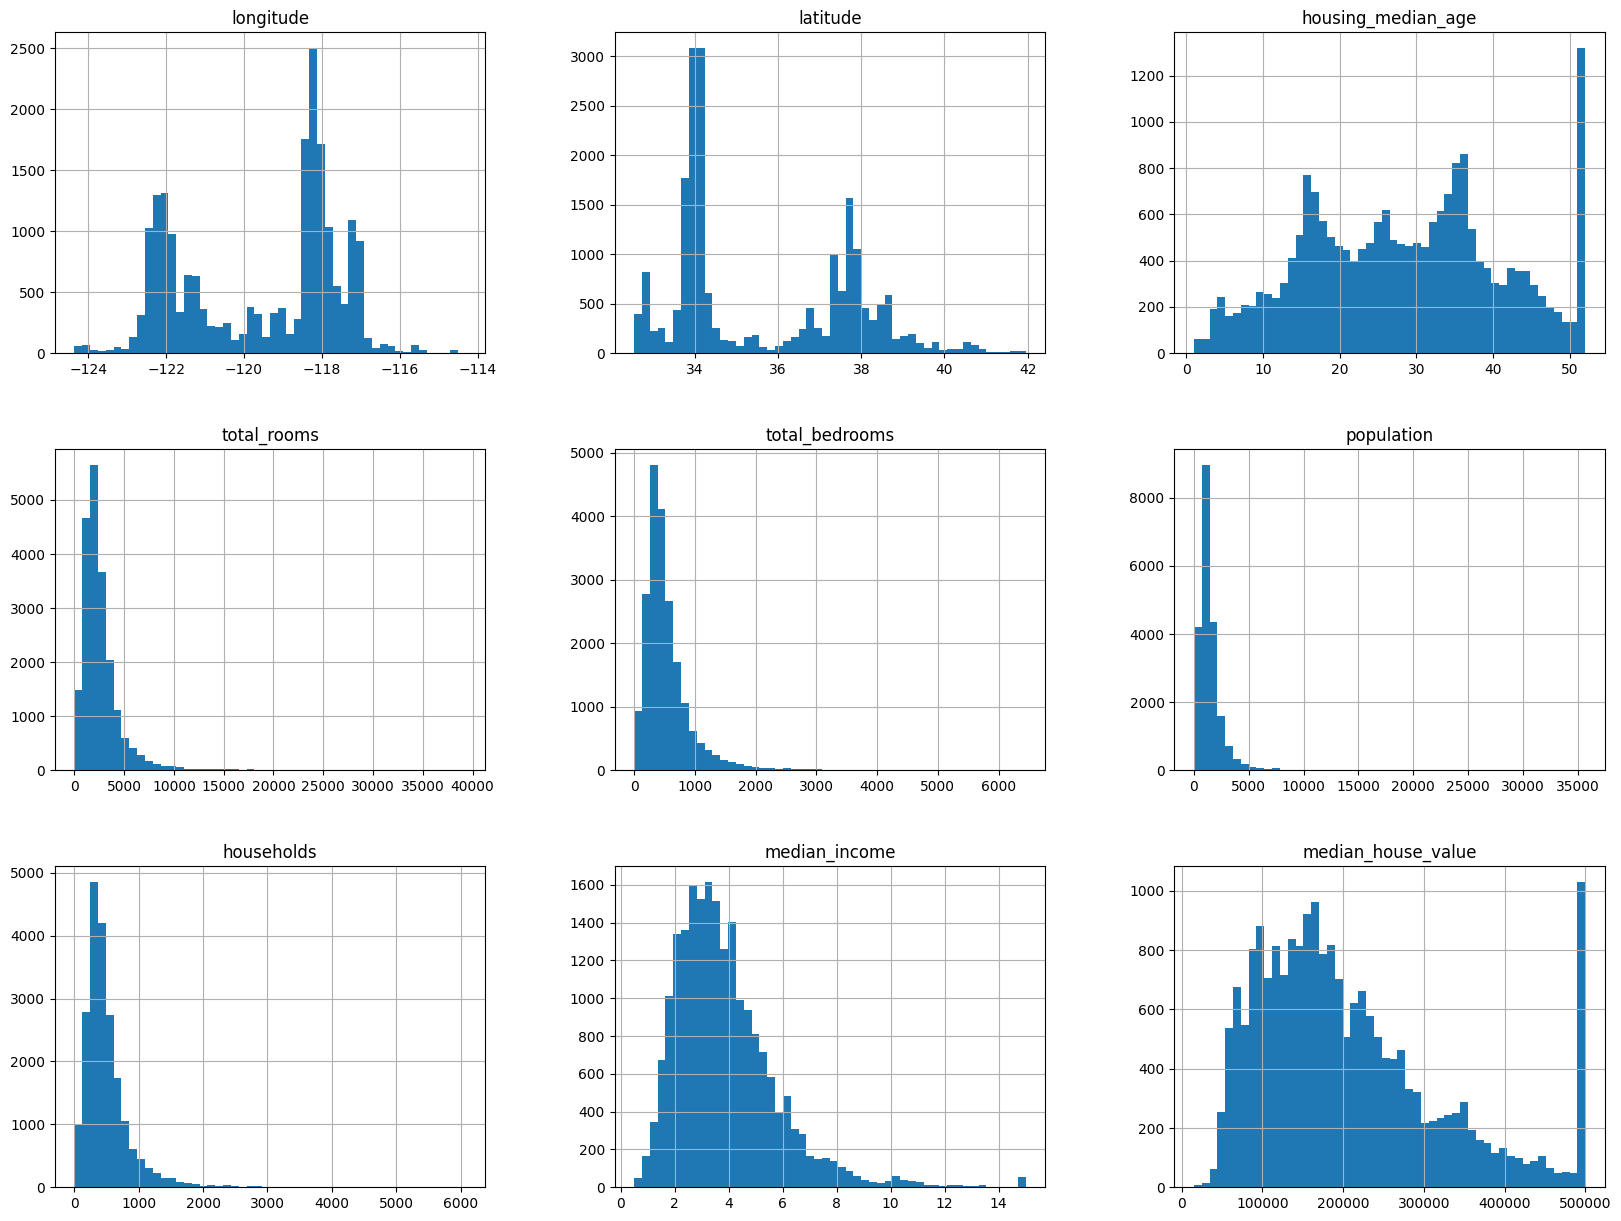

In [32]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [39]:
#Splitting data 
import numpy as np 
def split_training_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indicies = shuffled_indices[:test_set_size]
    training_indices = shuffled_indices[test_set_size:]
    return data.iloc[training_indices], data.iloc[test_indicies]

train_set, test_set = split_training_test(housing, 0.2)
print(len(train_set), " training" )
print(len(test_set), "test")


16512  training
4128 test


Text(0.5, 1.0, 'scatter plot of housing districts by coordinates')

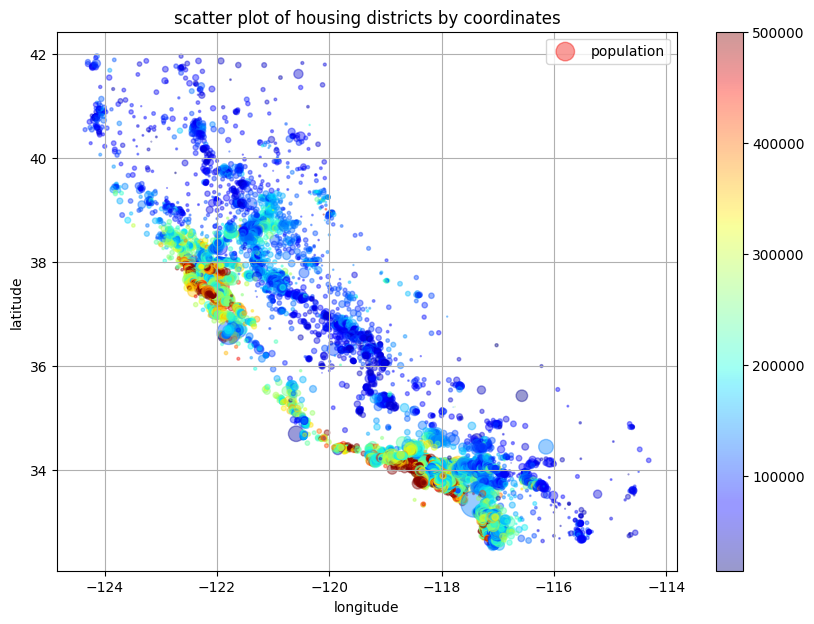

In [56]:
#visualising the data to get insights: 
alpha = 0.4 # to make it easier to view more densily populated areas
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=alpha, 
            s=housing["population"]/100, label='population', figsize=(10,7) ,
            c=housing["median_house_value"], cmap= plt.get_cmap('jet'), colorbar = True)

# s is for the size of the circles 
# c is for the color
plt.grid()
plt.title('scatter plot of housing districts by coordinates')
#in this case, the scatter plot shows that the image is for California, where it has densily populated 
# areas in the Bary area, LA, and San diego. plus a long line of fairly dense area in the centre. 

#It tells that the housing prices are higher closer to the ocean, and closer to the densly populated areas 


In [57]:
#correlation matrix, between each two attributes 
scatter
corr_matrix = housing.corr()

ValueError: could not convert string to float: 'NEAR BAY'